In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [3]:
# Pickup the 1000 data points as it take alot of time to run for 15k or 42k points

df = pd.read_csv("MNSIT_Train.csv")

standardized_data = StandardScaler().fit_transform(df.iloc[:, :-1])

data_1000 = standardized_data[:1000, :]
label_1000 = df.label.head(1000)

In [5]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

#**configure the parameters.**
#**the number of parametrs = 2, how many dimensions do we need in model.**
#**default perplexity = 30, we can change it if we need.**
#**default learning rate = 200.**
#**default maximum number of iterations for optimization is 1000.**

In [22]:
model = TSNE(n_components = 2, random_state = 0)

tsne_data = model.fit_transform(data_1000)

C:\Users\Mani\Anaconda3\envs\your-env-name\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


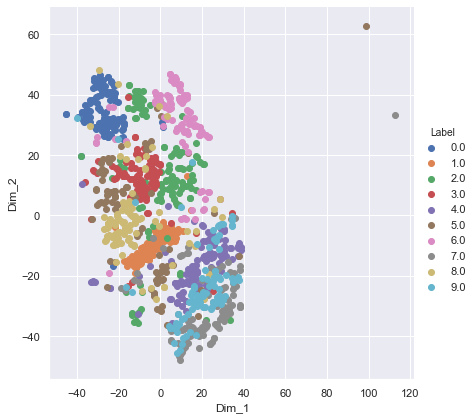

In [23]:
# Creating a new data frame which helps us in ploting the result data.
tsne_data = np.vstack((tsne_data.T, label_1000)).T
tsne_df = pd.DataFrame(tsne_data, columns = ["Dim_1", "Dim_2", "Label"])

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue = "Label", size = 6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

# Intution

#**1. Compared to PCA t-SNE is performing well on data, classifying data much better than PCA.**
#**2. Still there is over lapping but clusters are well seperated.**
#**3. We may get good result if we change perplexity , no of iterations and no of data points.**

C:\Users\Mani\Anaconda3\envs\your-env-name\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


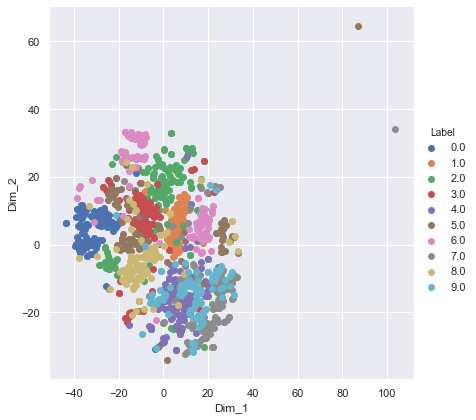

In [25]:
# Performing model with perplexity =  50
model = TSNE(n_components = 2, random_state = 0, perplexity = 50)
tsne_data = model.fit_transform(data_1000)

# Creating a new data frame which helps us in ploting the result data.
tsne_data = np.vstack((tsne_data.T, label_1000)).T
tsne_df = pd.DataFrame(tsne_data, columns = ["Dim_1", "Dim_2", "Label"])

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue = "Label", size = 6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

**Image still looks stabilized one, same as the pervious one.**

C:\Users\Mani\Anaconda3\envs\your-env-name\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


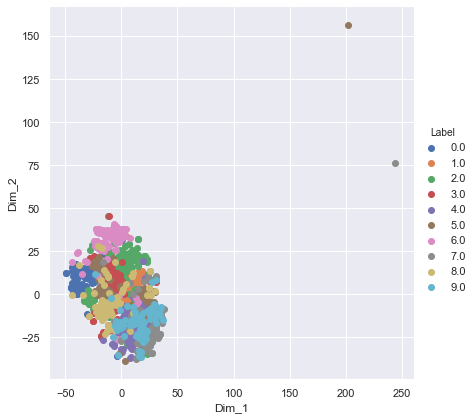

In [26]:
# Creating model with perplexity = 50, and no of iterations = 5000
model = TSNE(n_components = 2, random_state = 0, perplexity = 50, n_iter = 5000)
tsne_data = model.fit_transform(data_1000)

# Creating a new data frame which helps us in ploting the result data.
tsne_data = np.vstack((tsne_data.T, label_1000)).T
tsne_df = pd.DataFrame(tsne_data, columns = ["Dim_1", "Dim_2", "Label"])

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue = "Label", size = 6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

**Picture still looks stablized but the inter_cluster distance has been reduced.**

C:\Users\Mani\Anaconda3\envs\your-env-name\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


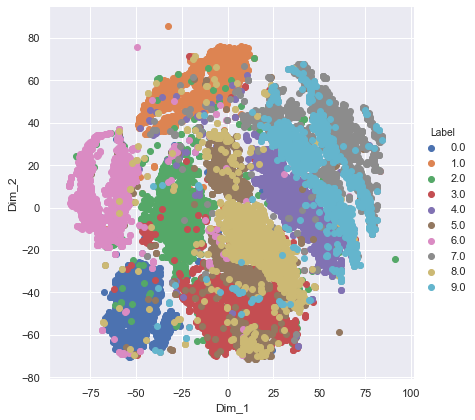

In [28]:
# Lets take 15k points, 30 perplexity and 1000 iterations
data_15k = standardized_data[:15000, :]
model = TSNE(n_components = 2, random_state = 0, perplexity = 30)
tsne_data = model.fit_transform(data_15k)

# Creating a new data frame which helps us in ploting the result data.
tsne_data = np.vstack((tsne_data.T, df.label.head(15000))).T
tsne_df = pd.DataFrame(tsne_data, columns = ["Dim_1", "Dim_2", "Label"])

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue = "Label", size = 6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

**After taking 15000 points labels are classified very well.**
#**There is little amount of overlapping.**

C:\Users\Mani\Anaconda3\envs\your-env-name\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


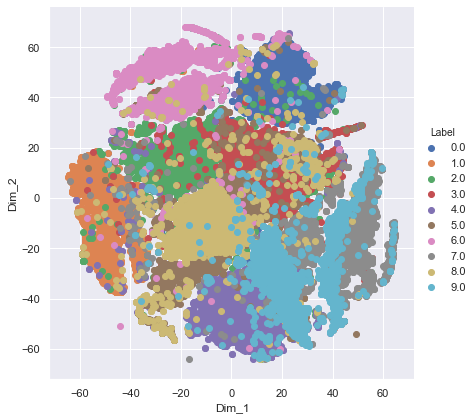

time taken to execute the above code is  3323.5849368572235


In [29]:
#lets take 42000 points
import time

start_time = time.time()

model = TSNE(n_components = 2, random_state = 0, perplexity = 30)
tsne_data = model.fit_transform(standardized_data)

# Creating a new data frame which helps us in ploting the result data.
tsne_data = np.vstack((tsne_data.T, df.label)).T
tsne_df = pd.DataFrame(tsne_data, columns = ["Dim_1", "Dim_2", "Label"])

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue = "Label", size = 6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

end_time = time.time()

print("time taken to execute the above code is ", end_time - start_time)

C:\Users\Mani\Anaconda3\envs\your-env-name\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


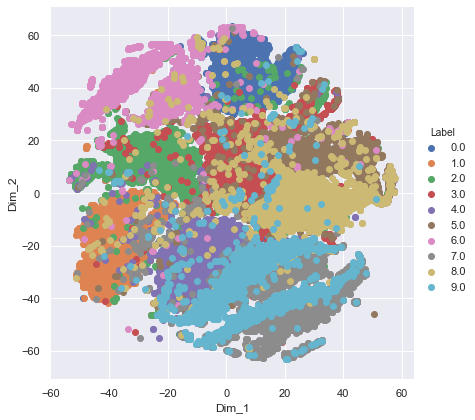

98.80284247795741

In [31]:
start_time = time.time()
model = TSNE(n_components = 2, random_state = 0, perplexity = 50)
tsne_data = model.fit_transform(standardized_data)

# Creating a new data frame which helps us in ploting the result data.
tsne_data = np.vstack((tsne_data.T, df.label)).T
tsne_df = pd.DataFrame(tsne_data, columns = ["Dim_1", "Dim_2", "Label"])

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue = "Label", size = 6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()
end_time = time.time()

minutes = (end_time - start_time) / 60
minutes